In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

In [7]:
df.head()  

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
#dropping blank columns
df.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [17]:
#checking null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
#dropping null values
df.dropna(inplace = True)

In [27]:
#changing data type of amount from float to int
df['Amount'] = df['Amount'].astype('int')

In [31]:
df['Amount'].dtypes

dtype('int32')

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [35]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [37]:
#using describe for some specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

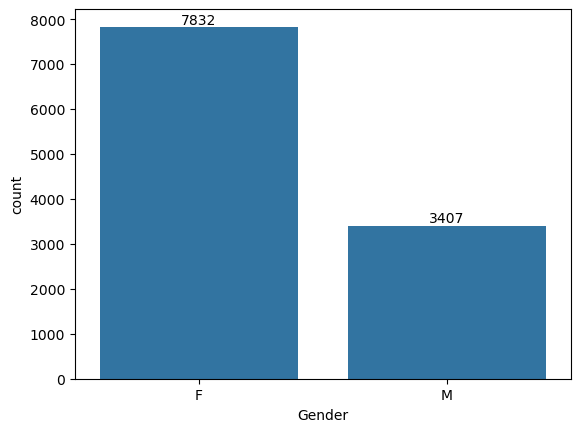

In [55]:
#plotting a bar chart for Gender and it's count

gen = sns.countplot(x = 'Gender',data = df)

#showing count
for bars in gen.containers:
    gen.bar_label(bars)

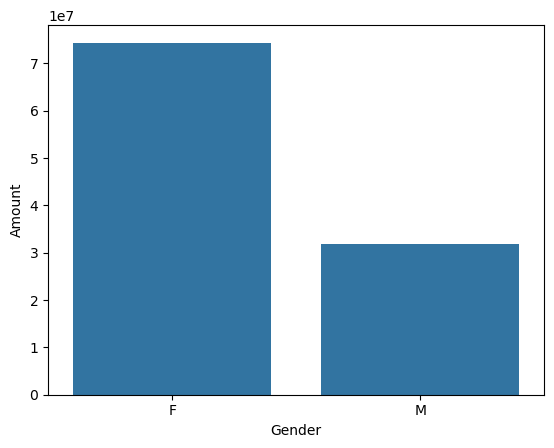

In [91]:
#plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',
                                                                        ascending = False)
sns.barplot(x = 'Gender',y = 'Amount',data = sales_gen)  
plt.show()

***From the above graphs we can see that most of the buyers are females and even the purchasing power of females is greater than males.***

### Age

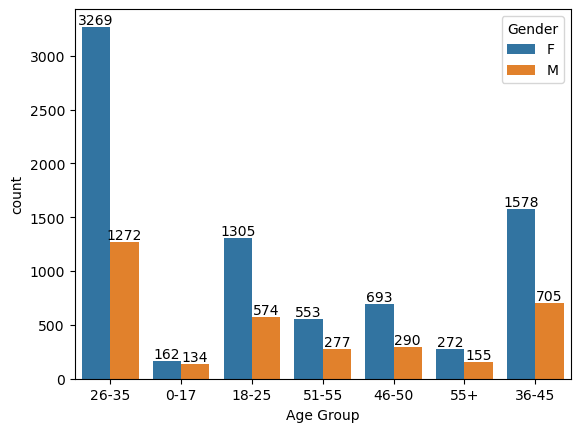

In [100]:
#plotting a bar chart for age group and it's count
age = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in age.containers:
    age.bar_label(bars)

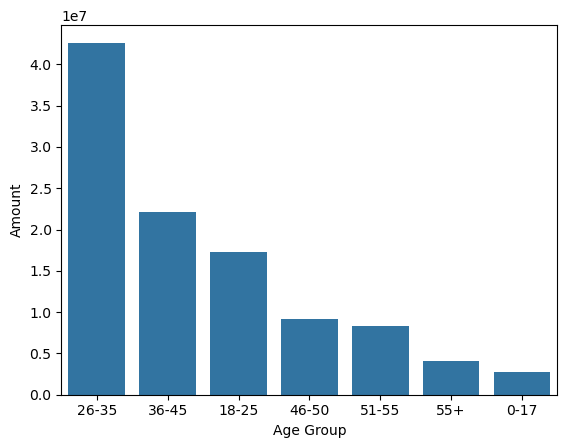

In [108]:
#Total Amount vs Age group

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(
                                              by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group',y = 'Amount', data = sales_age)
plt.show()

***From the above graphs we can see that most of the buyers are of age group between 26-35 years females.***

### State

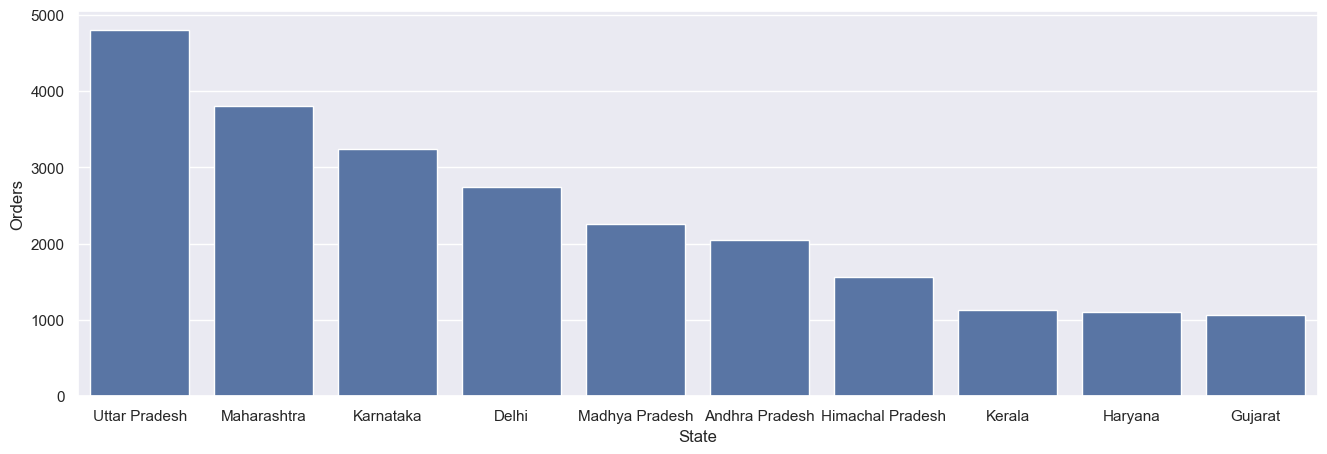

In [136]:
#getting total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(
                                                 by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = sales_state,x = 'State', y = 'Orders')
plt.show()

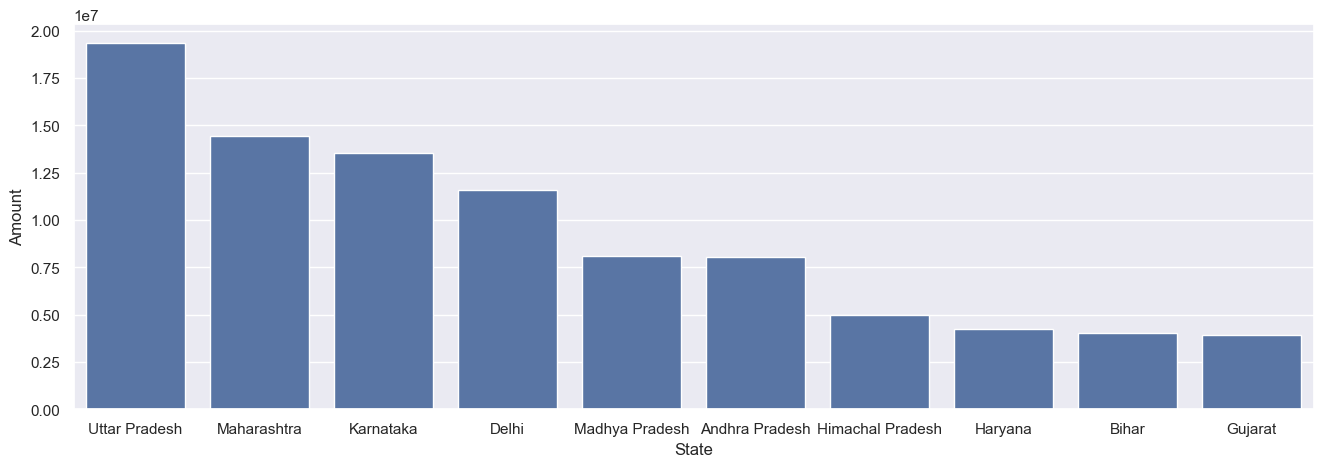

In [140]:
#total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(
                                        by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = sales_state, x = 'State',y = 'Amount')
plt.show()

***From the above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.***

### Marital Status

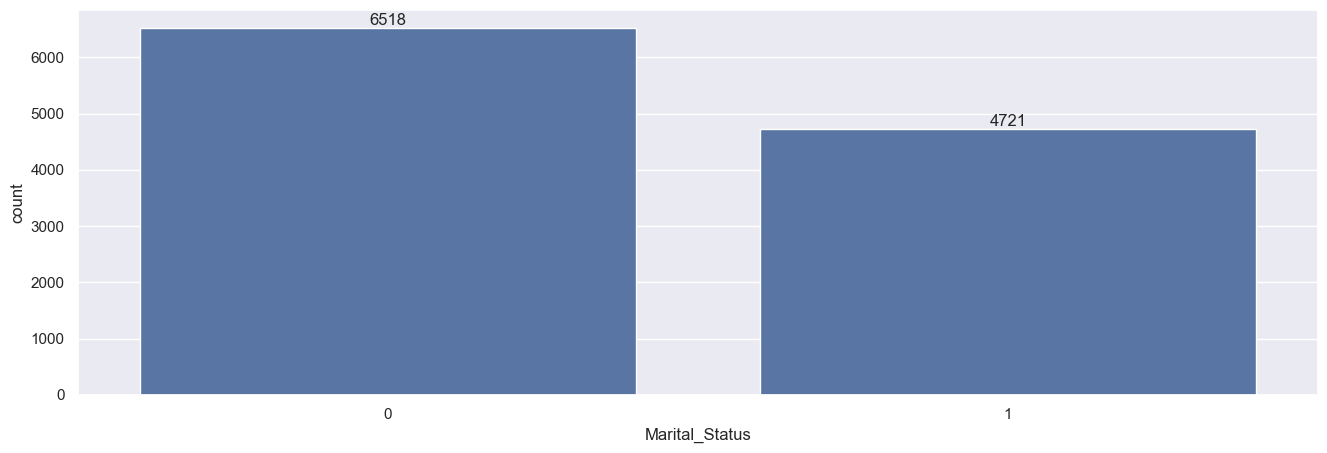

In [146]:
#plotting a count plot 
ms = sns.countplot(data = df,x = 'Marital_Status')

sns.set(rc = {'figure.figsize':(16,5)})
for bars in ms.containers:
    ms.bar_label(bars)

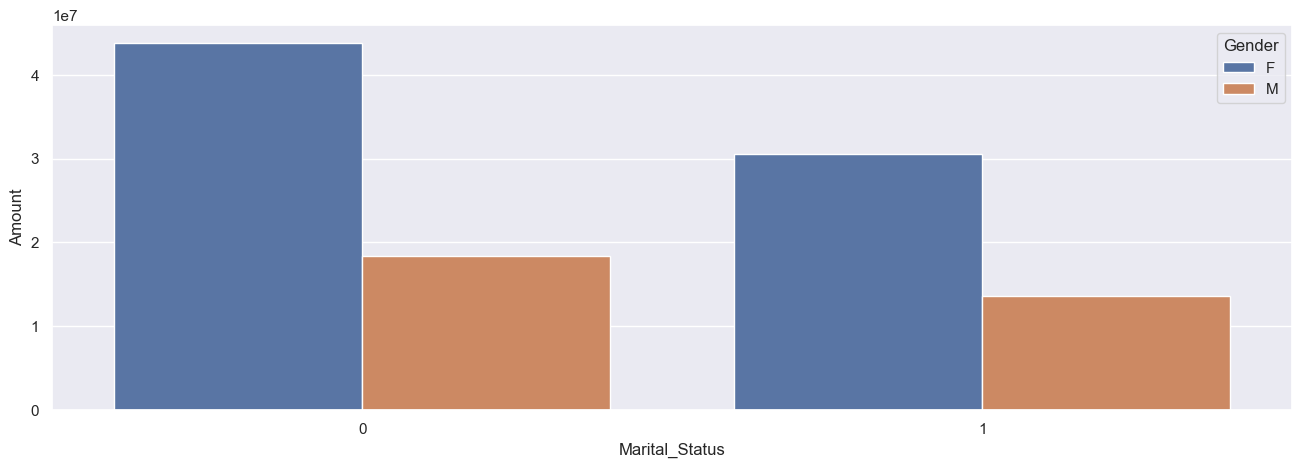

In [150]:
#getting Amount vs Marital_Status
sales_ms = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(16,5)})
sns.barplot(data = sales_ms, x = 'Marital_Status', y = 'Amount',hue = 'Gender')
plt.show()

***From the above graph we can see that most of the buyers are married(women) and they have high purchasing power.*** 

### Occupation

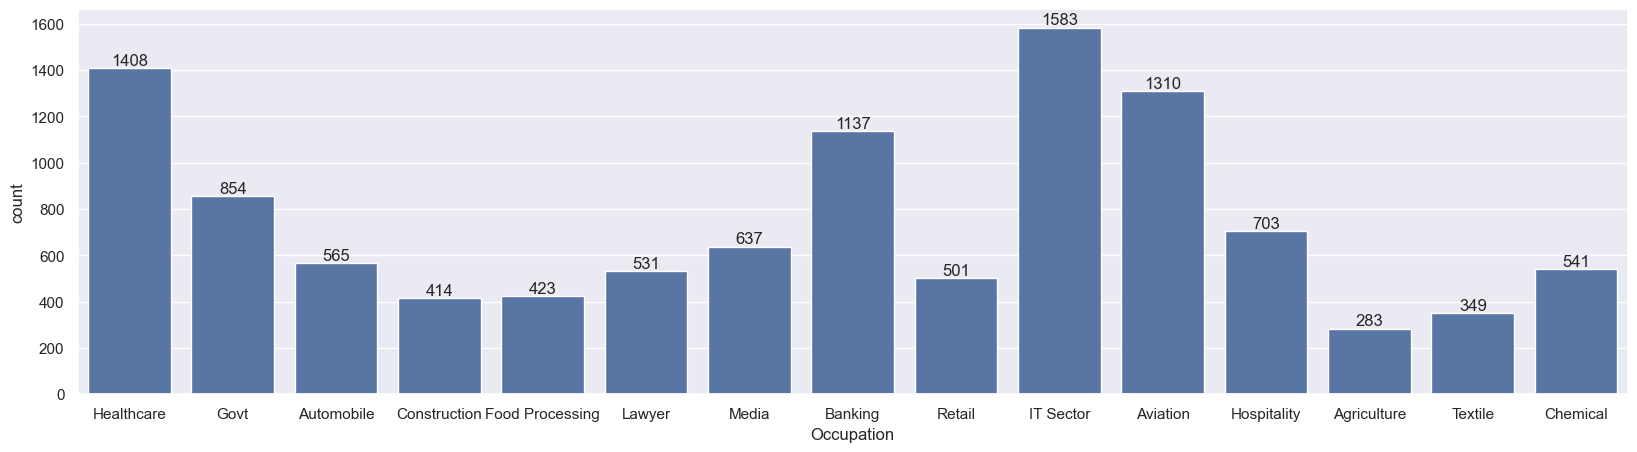

In [154]:
#plotting countplot for different occupation
sns.set(rc = {'figure.figsize':(20,5)})
occ = sns.countplot(data = df, x = 'Occupation')

for bars in occ.containers:
    occ.bar_label(bars)

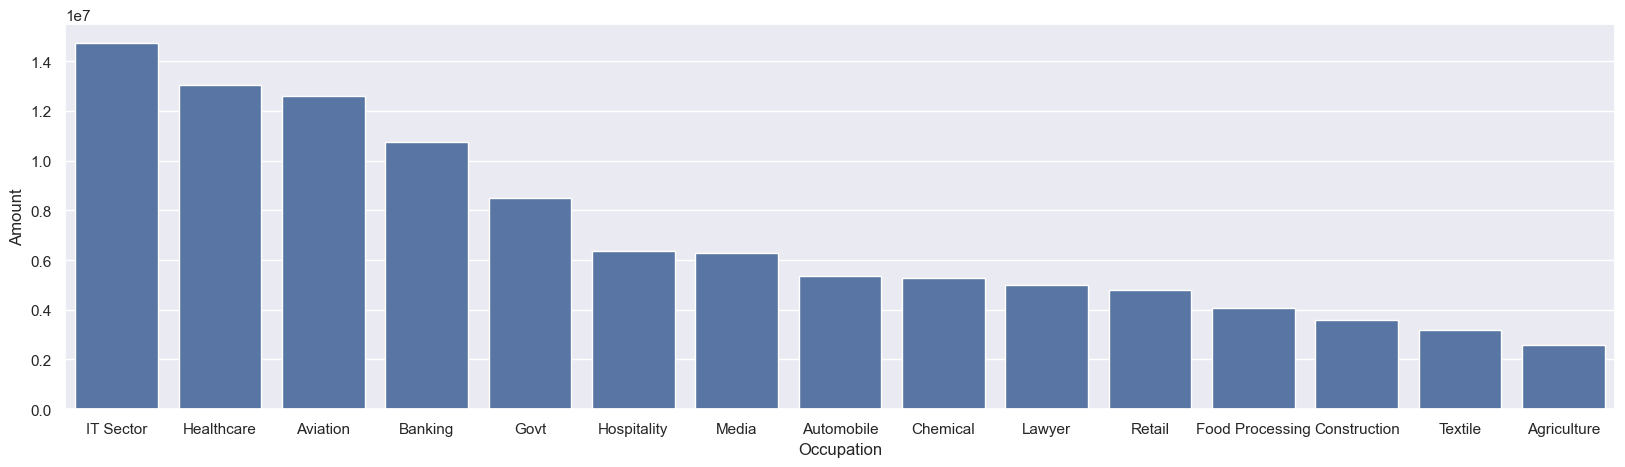

In [158]:
#getting graph of Occupation vs Amount
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(
                                              by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_occ, x = 'Occupation',y = 'Amount')
plt.show()

***From the above graph we can see that most of the buyers are working in IT sector,Healthcare and Aviation Sector.***

### Product Category

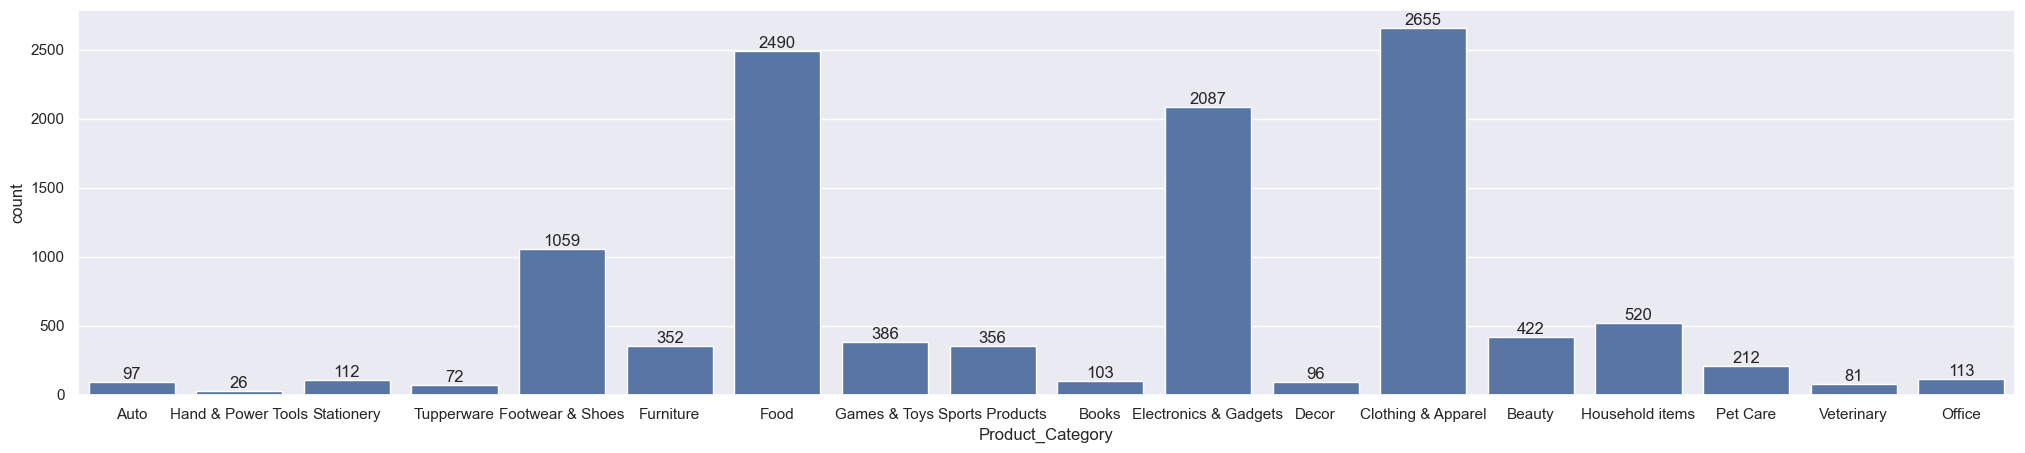

In [177]:
#plotting a countplot for Product Category
sns.set(rc = {'figure.figsize':(25,5)})
pc = sns.countplot(data = df, x = 'Product_Category')

for bars in pc.containers:
    pc.bar_label(bars)

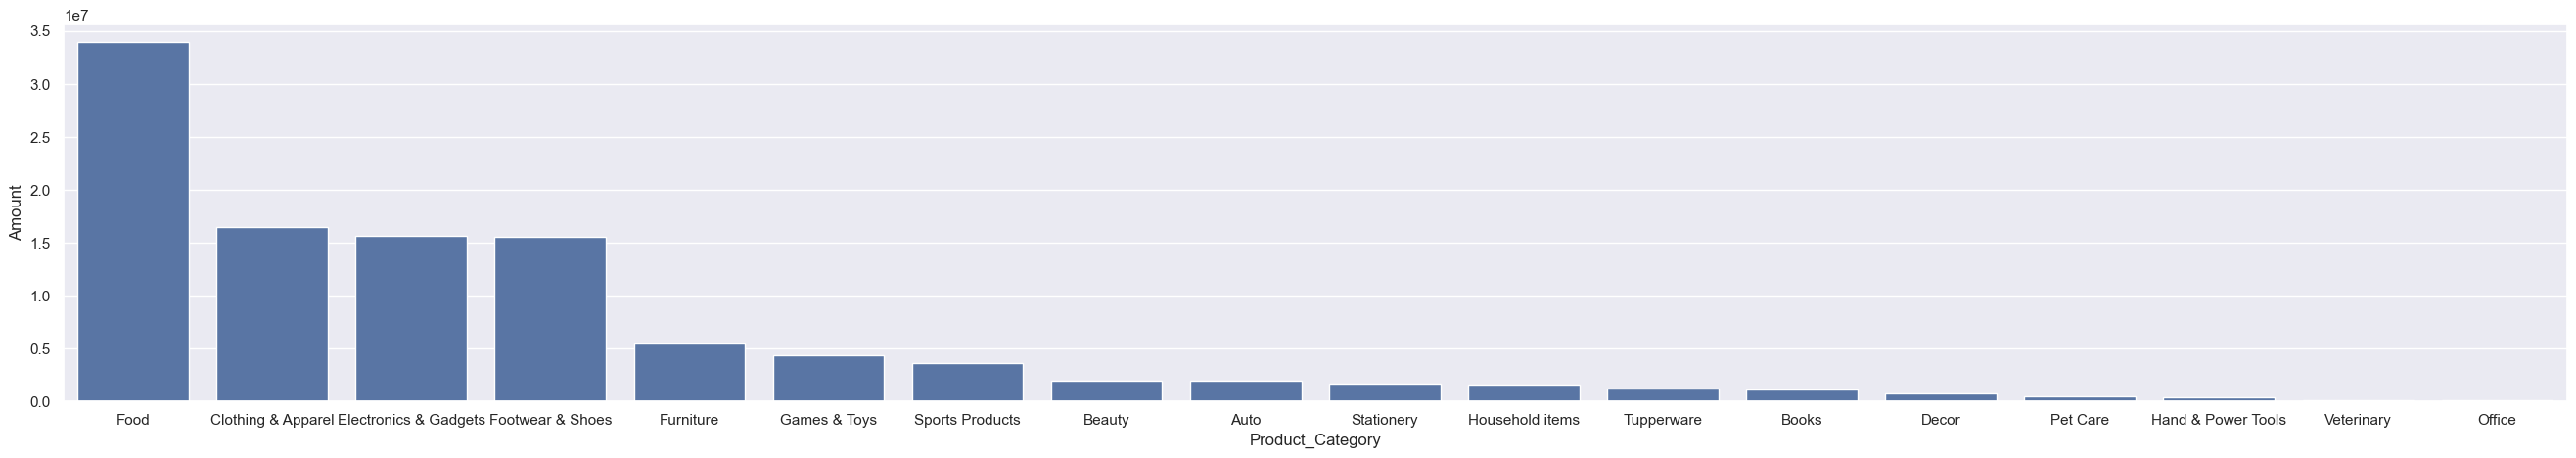

In [185]:
#getting Product Category vs Amount
sales_pc = df.groupby(['Product_Category'], as_index = False).sum().sort_values(
                                              by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(33,5)})
sns.barplot(data = sales_pc, x = 'Product_Category', y = 'Amount')
plt.show()

***From the above graph we can see that most of the sold products are from Food, Clothing and Electronics Category.***

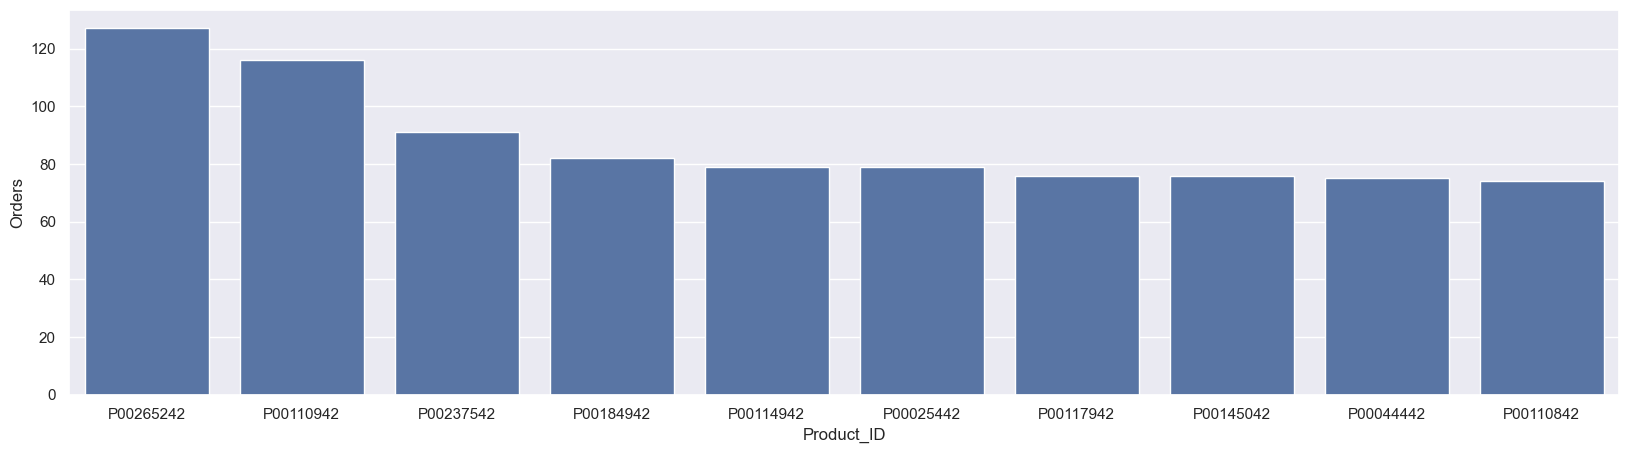

In [191]:
#plotting a barplot for Product IDs
sales_pid = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(
                                                 by = 'Orders', ascending= False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = sales_pid, x = 'Product_ID', y = 'Orders')
plt.show()

## Conclusion:

***Married Women of Age Group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics Category.***

# Project Completed